Sentiment
Positive    645
Neutral     369
Negative     11
Name: count, dtype: int64


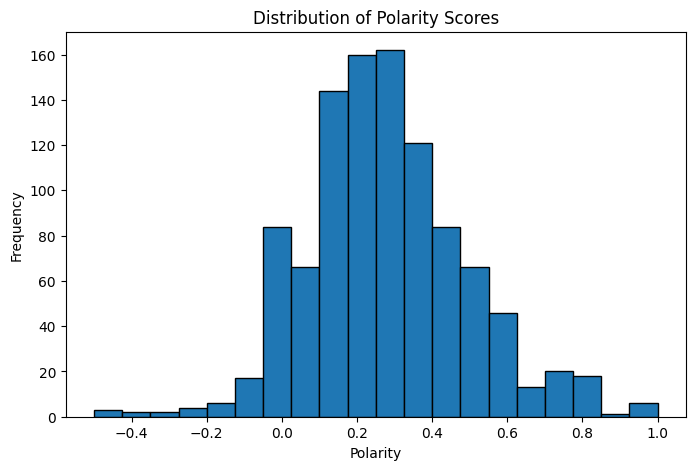

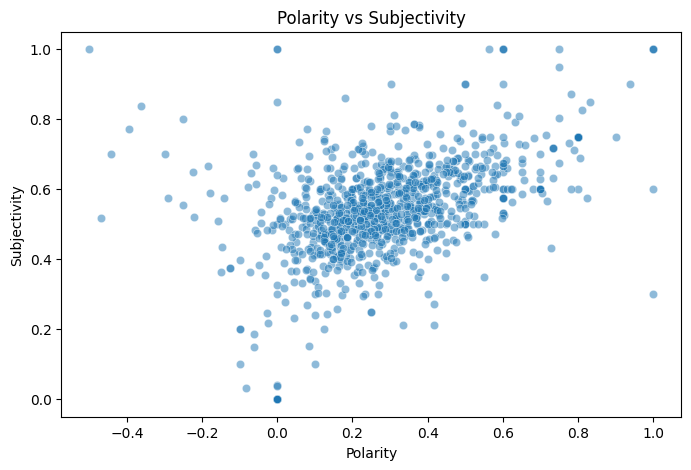

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name,review_length,normalized_rating,Polarity,Subjectivity,Sentiment
0,R1TNTONRLTPEWR,B09FM6PDHP,5.0 out of 5 stars Raycons better up their gam...,Dawson,5.0,Before I bought these I had raycons. Raycon ea...,NaN,AGI3WTFII3HB6JI2GL5PM7J7F7DQ,1,54,Color: BlackStyle: Headphones,JBL Tune 230NC,318,1.00,0.397921,0.620471,Positive
1,R11OSJ184YK5L8,B09FM6PDHP,5.0 out of 5 stars Amazing sound quality,Amazon Customer,5.0,This review is representative of my first impr...,NaN,AHDFGIHZLAWNS6GVEJFT6HO4JONQ,1,18,Color: BlackStyle: Headphones,JBL Tune 230NC,389,1.00,0.245455,0.590492,Positive
2,R2ND8UB3QKR4XD,B09FM6PDHP,4.0 out of 5 stars JBL for the win.,Amber,4.0,"Affordable, and great all arounder. Noise canc...",NaN,AHKSTPYCQ256XNBIJJNN5IKNF43A,1,1,Color: BlueStyle: Headphones,JBL Tune 230NC,128,0.75,0.313141,0.500000,Positive
3,R1ATLW9X08QUD0,B09FM6PDHP,"5.0 out of 5 stars Great sound, comfortable in...",Rusty Squeezebox,5.0,"Took a chance and bought these on prime day, p...",NaN,AGYXE4BIFF7ICA2CNQ27K5VYPBCQ,1,0,Color: BlackStyle: Headphones,JBL Tune 230NC,127,1.00,0.226562,0.528646,Positive
4,R1PDE5V244R06D,B09FM6PDHP,"5.0 out of 5 stars At 50% or more off, these a...",Dru Ha,5.0,I have one pair for work and one for home/goin...,NaN,AFUR62MXQUALQJX5LDFW3KOQBQLA,1,99,Color: BlueStyle: Headphones,JBL Tune 230NC,462,1.00,0.175028,0.466153,Neutral


In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prepared dataset
df = pd.read_csv("earbuds_reviews_prepared_for_analysis.csv")

# Ensure content is string
df["content"] = df["content"].fillna("").astype(str)

# -----------------------------
# Apply TextBlob Sentiment
# -----------------------------
df["Polarity"] = df["content"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["Subjectivity"] = df["content"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# -----------------------------
# Categorize Sentiment
# -----------------------------
def categorize_sentiment(polarity):
    if polarity > 0.2:
        return "Positive"
    elif polarity < -0.2:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Polarity"].apply(categorize_sentiment)

# -----------------------------
# Sentiment Distribution
# -----------------------------
print(df["Sentiment"].value_counts())

# -----------------------------
# Polarity Distribution
# -----------------------------
plt.figure(figsize=(8,5))
plt.hist(df["Polarity"], bins=20, edgecolor="black")
plt.title("Distribution of Polarity Scores")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

# -----------------------------
# Polarity vs Subjectivity
# -----------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="Polarity",
    y="Subjectivity",
    data=df,
    alpha=0.5
)
plt.title("Polarity vs Subjectivity")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

# -----------------------------
# Save Output for Gemini
# -----------------------------
df.to_csv("sentiment_analysis_results.csv", index=False)

df.head()